# 03 - Exploratory Data Analysis

In this notebook, we explore the cleaned house price dataset to understand patterns and trends in the data.

**Objectives:**
- Understand the distribution of house prices
- Explore trends over time
- Identify differences between regions
- Understand correlations between variables


This imports three Python libraries
    
-pandas witch helps work with data in tables

-matplotlib.pyplot lets you create charts.

-seaborn helps you make nicer, more advanced charts.


then it reads the cleaned data from the saved file and stores it in a variable called df so i can start exploring it 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_chunk = pd.read_csv("../outputs/datasets/collection/HousePricesRecords_clean.csv")

### Summary Statistics
this gives an overview of numerical columns .

In [2]:
df_chunk.describe()

,Price,Old/New,Duration,Year,Month
count,1.000000e+03,1000.000000,1000.000000,1000.0,1000.000000
mean,6.894192e+04,0.135000,0.806000,1995.0,6.800000
std,6.947193e+04,0.341895,0.395627,0.0,3.391682
min,6.950000e+03,0.000000,0.000000,1995.0,1.000000
25%,3.900000e+04,0.000000,1.000000,1995.0,4.000000
50%,5.550000e+04,0.000000,1.000000,1995.0,7.000000
75%,7.961250e+04,0.000000,1.000000,1995.0,10.000000
max,1.375000e+06,1.000000,1.000000,1995.0,12.000000


### Value Counts for Key Categorical Columns
Shows how often each value appears in selected columns helps spot issues and understand the data distribution.

In [3]:
categorical_cols = ["Old/New", "Duration", "County", "Town/City"]
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_chunk[col].value_counts())


Value counts for Old/New:
Old/New
0    865
1    135
Name: count, dtype: int64

Value counts for Duration:
Duration
1    806
0    194
Name: count, dtype: int64

Value counts for County:
County
GREATER LONDON           121
WEST MIDLANDS             43
GREATER MANCHESTER        40
WEST YORKSHIRE            38
ESSEX                     36
                        ... 
SLOUGH                     1
RUTLAND                    1
CONWY                      1
SOUTH GLOUCESTERSHIRE      1
YORK                       1
Name: count, Length: 85, dtype: int64

Value counts for Town/City:
Town/City
LONDON                67
BIRMINGHAM            15
LEICESTER             14
MANCHESTER            14
NOTTINGHAM            13
                      ..
HYTHE                  1
SURBITON               1
MALVERN                1
CHALFONT ST. GILES     1
HELSTON                1
Name: count, Length: 449, dtype: int64


### Distribution of House Prices
This shows the spread of house prices.

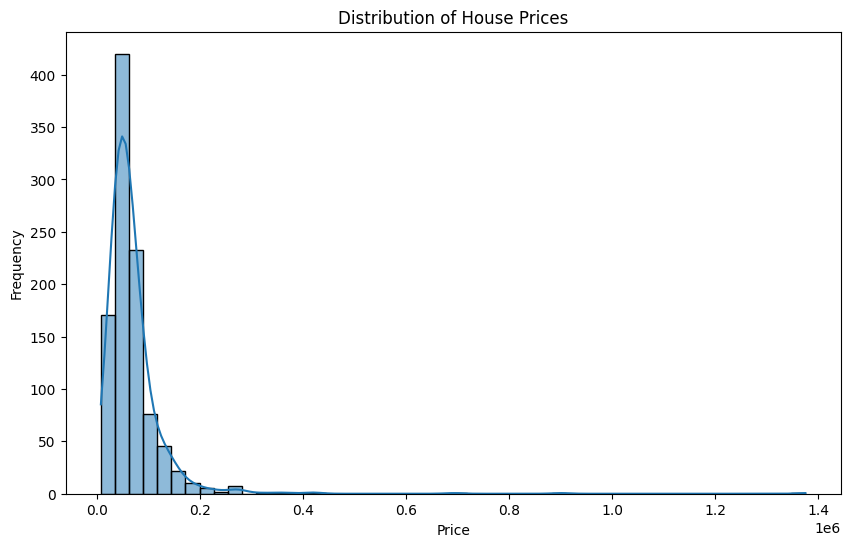

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df_chunk['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Average House Price Per Year
This highlights trends in pricing over time.

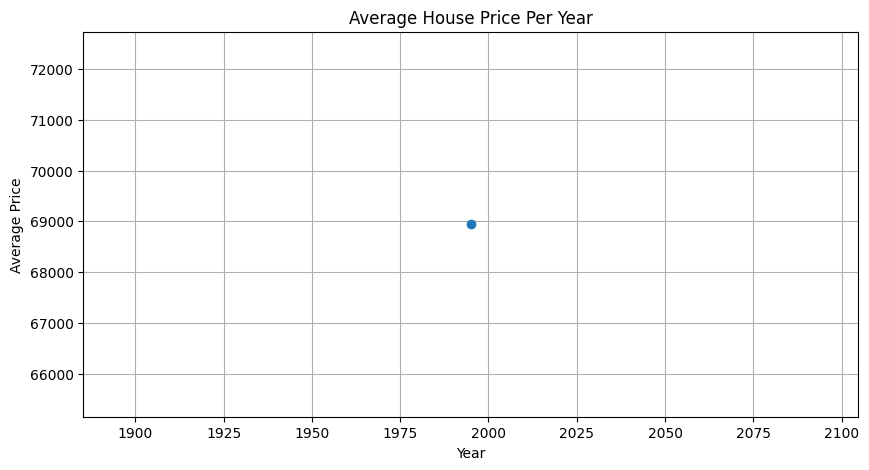

In [5]:
avg_price_year = df_chunk.groupby("Year")['Price'].mean()
avg_price_year.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average House Price Per Year')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.grid(True)
plt.show()

### Average House Price by County
Shows regional price differences.

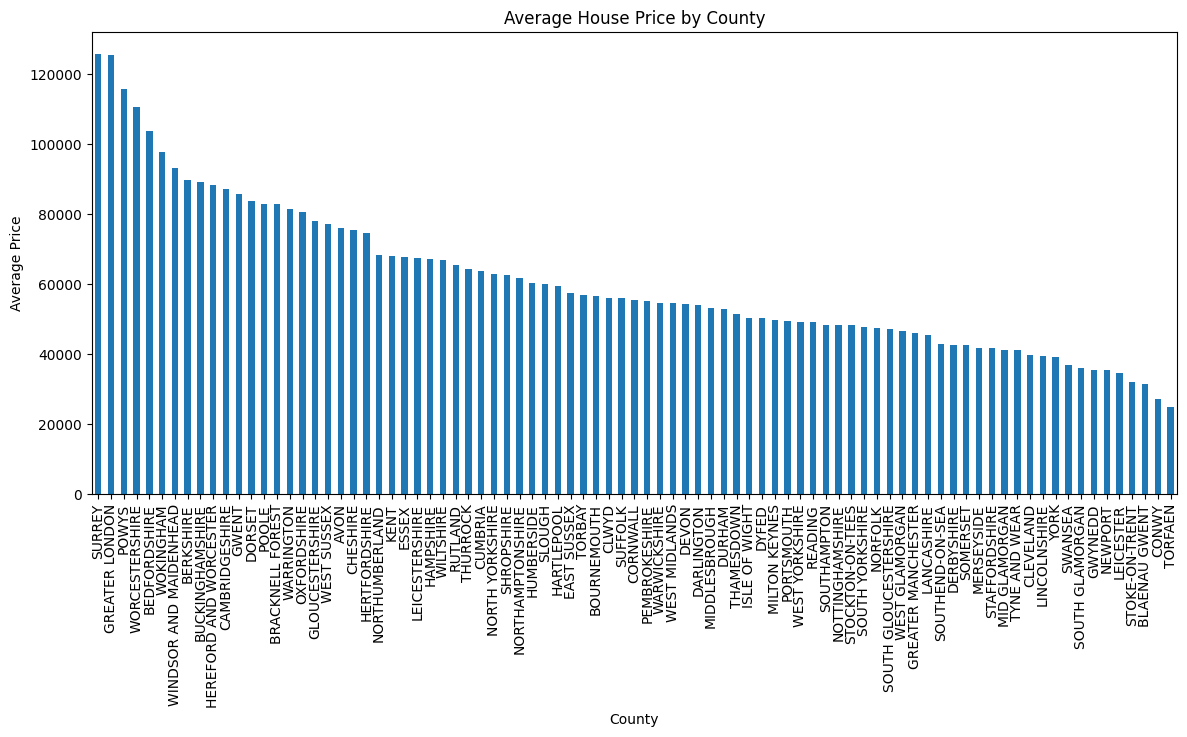

In [6]:
plt.figure(figsize=(14, 6))
df_chunk.groupby("County")["Price"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average House Price by County")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

### Correlation Heatmap
Understand relationships between numerical variables.

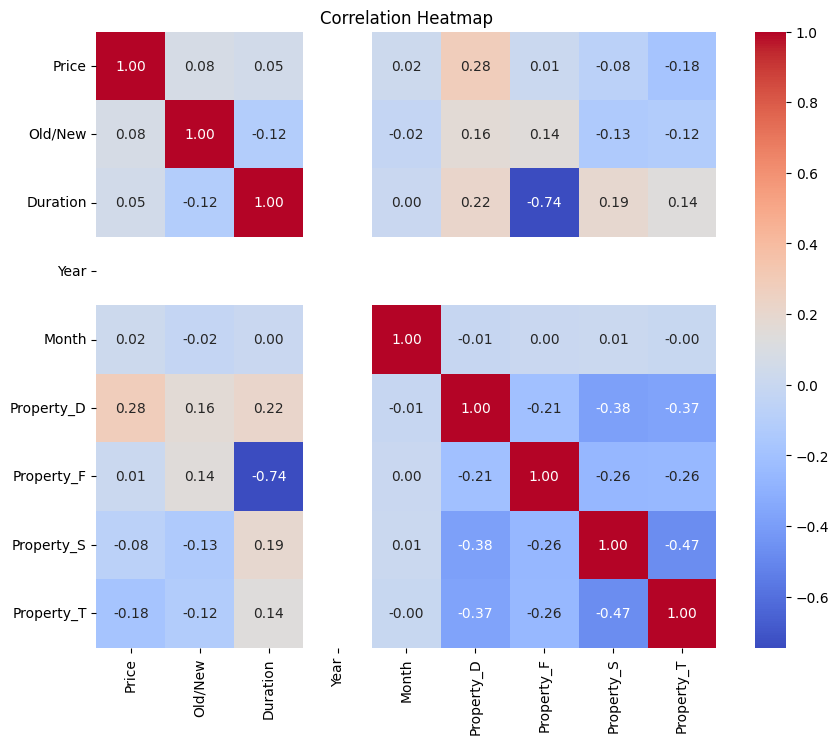

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_chunk.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()